In [2]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt

C:\Users\HUAWEI\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Part 1. Data Selection

In [22]:
# We get API from personal room in Egov Data
# Then we use shared data and get access by using our api.
# Using requests library we can easily get data and use pandas to convert it to dataframe.

api_key = 'db1d901da4114fca80d47ab2fd4eb480'
url = 'https://data.egov.kz/api/v4/illnesses/v1?source={"size": 100000}'
params = {'apiKey': api_key}
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

response = requests.get(url, params=params, headers=headers)
data = response.json()

In [25]:
df = pd.DataFrame(data)
df.to_csv('Illness.csv', index = False)

## Illness.csv Documentation | Before Data wrangling

- `region` : Region where the illness occurred.
- `id`: Unique identifier of the record.
- `icd_name` : Name of the medical condition according to the International Classification of Diseases (ICD).
- `cat` : Category of the medical condition.
- `sdu_load_i` : Load information.
- `subcode` : Additional code.
- `code` : Medical condition code.
- `patients_c` : Number of patients.
- `icd10` : ICD-10 code corresponding to the medical condition.

In [70]:
df = pd.read_csv('Illness.csv')
df

,region,diagnosis,pcount,code
0,Туркестанская область,Псориаз обыкновенный,270,L40.0
1,Алматинская область,Доброкачественные новообразования других уточн...,19,D36.7
2,Северо-Казахстанская область,Множественное поражение клапанов сердца неуточ...,1,I08.9
3,Атырауская область,Другие врожденные аномалии бронхов,1,Q32.4
4,Туркестанская область,Аппендицит неуточненный,29,K37
...,...,...,...,...
9995,Абайская область,Новообразование неопределенного и неизвестного...,5,D43.4
9996,Акмолинская область,Воспалительная болезнь предстательной железы н...,2,N41.9
9997,Павлодарская область,Другие и неуточненные повреждения шейного отде...,3,S14.1
9998,Алматы,Болезнь крона тонкой кишки,244,K50.0


In [42]:
# Let's describe the dataframe:
df.describe()

,pcount
count,10000.000000
mean,313.873900
std,2754.031095
min,1.000000
25%,2.000000
50%,8.000000
75%,49.000000
max,138426.000000


In [43]:
# Let's see data of data we have:
df.dtypes

region       object
diagnosis    object
pcount        int64
code         object
dtype: object

# Cleaning data

- We clearly see that there a few columns with 5 unique columns, that doesn't have enough information
- In this case it will be right too drop them.

In [35]:
df = df.drop(columns=['code', 'subcode', 'cat', 'sdu_load_i','id'])
df

,region,icd_name,patients_c,icd10
0,Туркестанская область,Псориаз обыкновенный,270,L40.0
1,Алматинская область,Доброкачественные новообразования других уточн...,19,D36.7
2,Северо-Казахстанская область,Множественное поражение клапанов сердца неуточ...,1,I08.9
3,Атырауская область,Другие врожденные аномалии бронхов,1,Q32.4
4,Туркестанская область,Аппендицит неуточненный,29,K37
...,...,...,...,...
9995,Абайская область,Новообразование неопределенного и неизвестного...,5,D43.4
9996,Акмолинская область,Воспалительная болезнь предстательной железы н...,2,N41.9
9997,Павлодарская область,Другие и неуточненные повреждения шейного отде...,3,S14.1
9998,Алматы г.а.,Болезнь крона тонкой кишки,244,K50.0


#### Bringing the values in the Region column to uniform values

In [71]:
df['region'].unique()

array(['Туркестанская область', 'Алматинская область',
       'Северо-Казахстанская область', 'Атырауская область',
       'Кызылординская область', 'Павлодарская область',
       'Акмолинская область', 'Абайская область', 'Жетысуская область',
       'Костанайская область', 'Южно-Казахстанская область',
       'Восточно-Казахстанская область', 'Мангистауская область',
       'Алматы', 'Жамбылская область', 'Карагандинская область',
       'Шымкент', 'Западно-Казахстанская область', 'Актюбинская область',
       'Улытауская область', 'Астана'], dtype=object)

In [72]:
df['region'] = df['region'].replace({
    'область Абай': 'Абайская область',
    'область Жетісу': 'Жетысуская область',
    'Алматы г.а.': 'Алматы',
    'Алматы Г.А.': 'Алматы',
    'Шымкент Г.А.': 'Шымкент',
    'г. Шымкент': 'Шымкент',
    'область Ұлытау': 'Улытауская область',
    'г. Астана': 'Астана',
    'г. Астана (действовавший до 23.03.2019)': 'Астана'
})

print(df['region'].unique())


['Туркестанская область' 'Алматинская область'
 'Северо-Казахстанская область' 'Атырауская область'
 'Кызылординская область' 'Павлодарская область' 'Акмолинская область'
 'Абайская область' 'Жетысуская область' 'Костанайская область'
 'Южно-Казахстанская область' 'Восточно-Казахстанская область'
 'Мангистауская область' 'Алматы' 'Жамбылская область'
 'Карагандинская область' 'Шымкент' 'Западно-Казахстанская область'
 'Актюбинская область' 'Улытауская область' 'Астана']


#### Renaming columns for comfort work

In [73]:
df = df.rename(columns={'icd_name': 'diagnosis', 'icd10': 'code', 'patients_c': 'pcount'})
df

,region,diagnosis,pcount,code
0,Туркестанская область,Псориаз обыкновенный,270,L40.0
1,Алматинская область,Доброкачественные новообразования других уточн...,19,D36.7
2,Северо-Казахстанская область,Множественное поражение клапанов сердца неуточ...,1,I08.9
3,Атырауская область,Другие врожденные аномалии бронхов,1,Q32.4
4,Туркестанская область,Аппендицит неуточненный,29,K37
...,...,...,...,...
9995,Абайская область,Новообразование неопределенного и неизвестного...,5,D43.4
9996,Акмолинская область,Воспалительная болезнь предстательной железы н...,2,N41.9
9997,Павлодарская область,Другие и неуточненные повреждения шейного отде...,3,S14.1
9998,Алматы,Болезнь крона тонкой кишки,244,K50.0


#### Classification of diseases into 5 levels and adding new dangerlevel column

- `Level 1 (Safe)` : Infectious and parasitic diseases (A&B)
- `Level 2 (Low Risk)` : Neoplasms (C, D)
- `Level 3 (Medium Dangerous)` : Endocrine, nutritional and metabolic diseases (E), Mental and behavioral disorders (F), Diseases of the nervous system (G), Diseases of the organs of vision and paranasal sinuses (H)
- `Level 4 (Dangerous)` : Diseases of the circulatory system (I), Diseases of the respiratory system (J), Diseases of the digestive system (K), Diseases of the skin and subcutaneous tissue (L), Diseases of the musculoskeletal system and connective tissue (M), Diseases of the genitourinary system (N), Diseases of pregnancy, childbirth and postpartum period (O), Conditions that occurred in the perinatal period (P), Congenital anomalies, deformities and chromosomal abnormalities (Q), Symptoms, signs and abnormal clinical and laboratory findings (R)
- `Level 5 (High probability of death)` : Injuries, poisoning and some other consequences of external causes (S, T, V, W, X, Y), Factors affecting health and contact with medical services (Z)

In [83]:
danger_levels = {
    'A': 1, 'B': 1, 'Z': 1,
    'E': 2, 'F': 2, 'G': 2,
    'K': 3, 'L': 3, 'N': 3, 'O': 3, 'H': 3,
    'I': 4, 'J': 4, 'M': 4, 'P': 4, 'Q': 4, 'R': 4,
    'S': 5, 'T': 5, 'V': 5, 'W': 5, 'X': 5, 'Y': 5, 'C': 5, 'D': 5
}

# Замена кодов на уровни опасности
df['dangerlevel'] = df['code'].str[0].map(danger_levels)

# Вывод первых нескольких строк, чтобы убедиться, что колонка dangerlevel добавлена корректно
df

,region,diagnosis,pcount,code,dangerlevel
0,Туркестанская область,Псориаз обыкновенный,270,L40.0,3.0
1,Алматинская область,Доброкачественные новообразования других уточн...,19,D36.7,5.0
2,Северо-Казахстанская область,Множественное поражение клапанов сердца неуточ...,1,I08.9,4.0
3,Атырауская область,Другие врожденные аномалии бронхов,1,Q32.4,4.0
4,Туркестанская область,Аппендицит неуточненный,29,K37,3.0
...,...,...,...,...,...
9995,Абайская область,Новообразование неопределенного и неизвестного...,5,D43.4,5.0
9996,Акмолинская область,Воспалительная болезнь предстательной железы н...,2,N41.9,3.0
9997,Павлодарская область,Другие и неуточненные повреждения шейного отде...,3,S14.1,5.0
9998,Алматы,Болезнь крона тонкой кишки,244,K50.0,3.0


In [97]:
# Сгруппируем данные по уровню опасности и подсчитаем количество больных в каждой группе
patients_by_danger_level = df.groupby('dangerlevel')['pcount'].sum()

# Выведем результат
print("Количество больных по уровням опасности:")
print(patients_by_danger_level)


Количество больных по уровням опасности:
dangerlevel
1.0     279573
2.0     388211
3.0     664615
4.0    1479996
5.0     326229
Name: pcount, dtype: int64


In [78]:
df

,region,diagnosis,pcount,code,dangerlevel
0,Туркестанская область,Псориаз обыкновенный,270,L40.0,4
1,Алматинская область,Доброкачественные новообразования других уточн...,19,D36.7,2
2,Северо-Казахстанская область,Множественное поражение клапанов сердца неуточ...,1,I08.9,4
3,Атырауская область,Другие врожденные аномалии бронхов,1,Q32.4,4
4,Туркестанская область,Аппендицит неуточненный,29,K37,4
...,...,...,...,...,...
9995,Абайская область,Новообразование неопределенного и неизвестного...,5,D43.4,2
9996,Акмолинская область,Воспалительная болезнь предстательной железы н...,2,N41.9,4
9997,Павлодарская область,Другие и неуточненные повреждения шейного отде...,3,S14.1,5
9998,Алматы,Болезнь крона тонкой кишки,244,K50.0,4


In [75]:
df.dtypes

region       object
diagnosis    object
pcount        int64
code         object
dtype: object

In [76]:
df.isnull().sum()

region       0
diagnosis    0
pcount       0
code         0
dtype: int64

In [79]:
df.to_csv('illness.csv', index=False)

- Since we requested the dataset from an official source, it has no flaws, missing values and outliers

# Explotary Data Analysis

#### Top 10 most common and least common Diseases

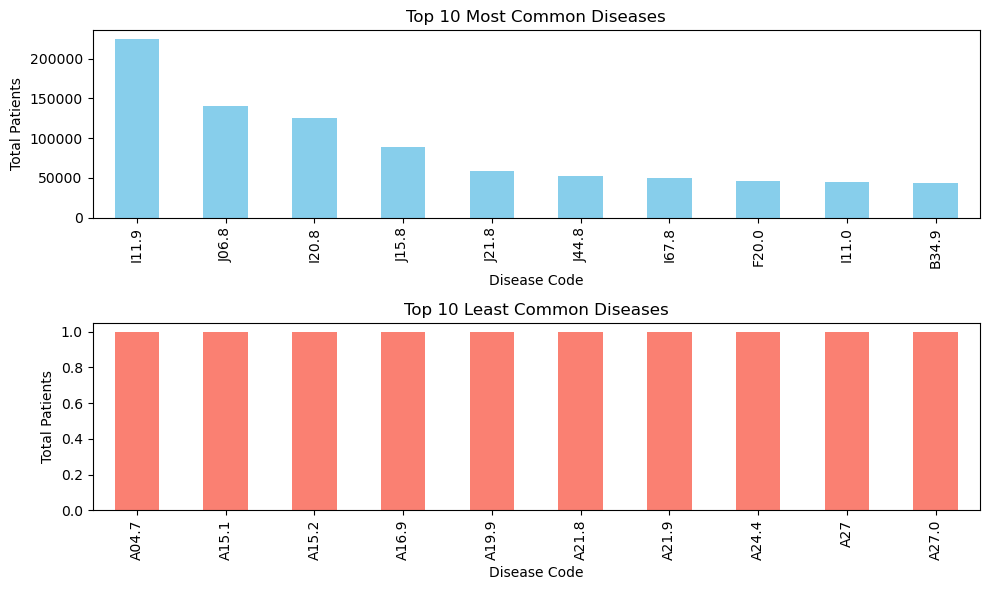

In [53]:
disease_counts = df.groupby('code')['pcount'].sum()

top_10_common = disease_counts.nlargest(10)
top_10_rare = disease_counts.nsmallest(10)

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
top_10_common.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Common Diseases')
plt.xlabel('Disease Code')
plt.ylabel('Total Patients')

plt.subplot(2, 1, 2)
top_10_rare.plot(kind='bar', color='salmon')
plt.title('Top 10 Least Common Diseases')
plt.xlabel('Disease Code')
plt.ylabel('Total Patients')

plt.tight_layout()
plt.show()

In [64]:
n = 1
a = 1
print("Top 10 Most Common Diseases:")
for diagnosis, count in top_10_common.items():
    print(f"{n}. {diagnosis}: {count} patients")
    n += 1

print("\nTop 10 Least Common Diseases:")
for diagnosis, count in top_10_rare.items():
    print(f"{a}. {diagnosis}: {count} patients")
    a += 1

Top 10 Most Common Diseases:
1. Гипертензивная (гипертоническая) болезнь с преимущественным поражением сердца без (застойной) сердечной недостаточности: 217120 patients
2. Другие острые инфекции верхних дыхательных путей множественной локализации: 140768 patients
3. Другие формы стенокардии: 125649 patients
4. Другие бактериальные пневмонии: 67330 patients
5. Острый бронхиолит, вызванный другими уточненными агентами: 58153 patients
6. Другая уточненная хроническая обструктивная легочная болезнь: 52922 patients
7. Другие уточненные поражения сосудов мозга: 49713 patients
8. Параноидная шизофрения: 45615 patients
9. Вирусная инфекция неуточненная: 43015 patients
10. Угрожающий аборт: 41766 patients

Top 10 Least Common Diseases:
1. Situs inversus: 1 patients
2. Spina bifida (неполное закрытие позвоночного канала): 1 patients
3. Spina bifida с гидроцефалией неуточненная: 1 patients
4. Spina bifida с гидроцефалией неуточнённая: 1 patients
5. Абдоминальный актиномикоз: 1 patients
6. Аборт н

#### Distribution and skewness coeff. of danger level

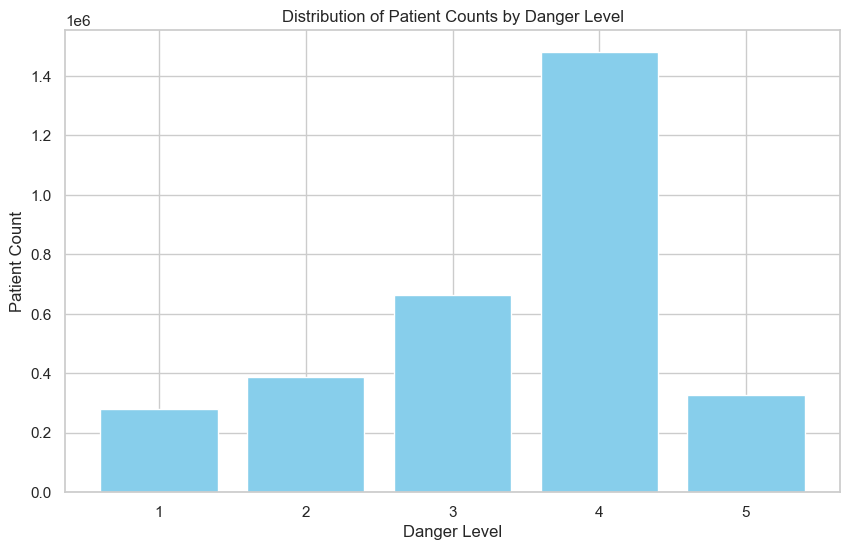

In [99]:
danger_level_counts = df.groupby('dangerlevel')['pcount'].sum()

plt.figure(figsize=(10, 6))

plt.bar(danger_level_counts.index, danger_level_counts.values, color='skyblue')

plt.title('Distribution of Patient Counts by Danger Level')
plt.xlabel('Danger Level')
plt.ylabel('Patient Count')

plt.show()


In [100]:
skew_coefficient = stats.skew(danger_level_counts)
print("Коэффициент асимметрии для распределения количества пациентов по уровням опасности:", skew_coefficient)

Коэффициент асимметрии для распределения количества пациентов по уровням опасности: 1.2030519901253942


#### Dangerous Diseases by Region

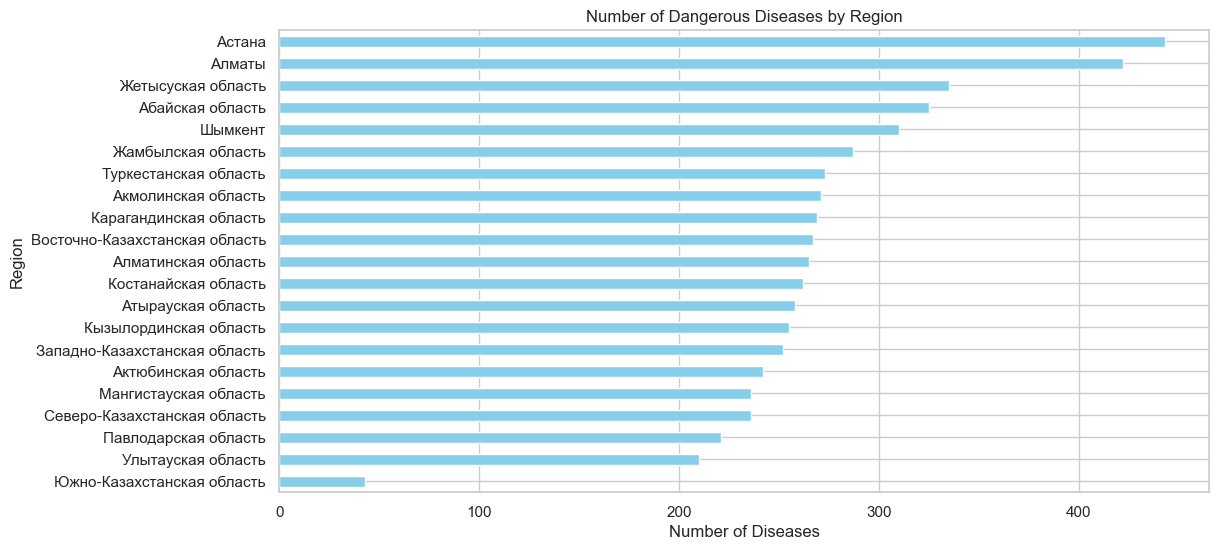

В регионе Астана больше всего опасных заболеваний (443 случаев).
В регионе Южно-Казахстанская область меньше всего опасных заболеваний (43 случаев).


In [101]:
# Отфильтровать данные для опасных заболеваний (уровни опасности 4 и 5)
dangerous_diseases = df[df['dangerlevel'].isin([4, 5])]

# Посчитать количество опасных заболеваний в каждом регионе
dangerous_diseases_count = dangerous_diseases.groupby('region').size().sort_values()

# Создать график
plt.figure(figsize=(12, 6))
dangerous_diseases_count.plot(kind='barh', color='skyblue')
plt.title('Number of Dangerous Diseases by Region')
plt.xlabel('Number of Diseases')
plt.ylabel('Region')
plt.show()

# Найти регион с наибольшим количеством опасных заболеваний
most_dangerous_region = dangerous_diseases_count.idxmax()
most_dangerous_count = dangerous_diseases_count.max()

# Найти регион с наименьшим количеством опасных заболеваний
least_dangerous_region = dangerous_diseases_count.idxmin()
least_dangerous_count = dangerous_diseases_count.min()

print(f"В регионе {most_dangerous_region} больше всего опасных заболеваний ({most_dangerous_count} случаев).")
print(f"В регионе {least_dangerous_region} меньше всего опасных заболеваний ({least_dangerous_count} случаев).")


### What diseases are leading in Semey City? Are there any consequences of the landfill? To check the conditions that occurred in the perinatal period (P), Congenital anomalies, deformities and chromosomal abnormalities (Q), Symptoms, signs and abnormal clinical and laboratory findings (R) in Kazakhstan. Where does Semey stand?

#### Most common diagnoses in Abay region

In [108]:
abai_region_data = df[df['region'] == 'Абайская область']

if abai_region_data.empty:
    print("В Абайской области нет записей о заболеваниях в данном наборе данных.")
else:
    diagnosis_counts_abai = abai_region_data['diagnosis'].value_counts()

    top_10_diagnoses_abai = diagnosis_counts_abai.head(10)
    print("Топ-10 самых распространенных диагнозов в Абайской области:")
    for i, (diagnosis, count) in enumerate(top_10_diagnoses_abai.items(), start=1):
        print(f"{i}. {diagnosis}")


Топ-10 самых распространенных диагнозов в Абайской области:
1. Злокачественное новообразование нижней доли, бронхов или легкого
2. Злокачественное поражение молочной железы, выходящее за пределы одной и более вышеуказанных локализаций
3. Злокачественное новообразование нижне-наружного квадранта молочной железы 
4. Перелом тела (диафиза) лучевой кости
5. Другие уточненные болезни поджелудочной железы
6. Подагра, обусловленная нарушением почечной функции
7. Злокачественное новообразование ребер, грудины и ключицы
8. Врожденный открытый артериальный проток
9. Хронический многоочаговый остеомиелит
10. Аллергический контактный дерматит, вызванный другими веществами


#### Number of diagnoses with P, Q and R types in Abay region

In [105]:
abai_conditions_PQR = df[(df['region'] == 'Абайская область') & df['code'].str.startswith(('P', 'Q', 'R'))]

abai_conditions_count = len(abai_conditions_PQR)

print("В Абайской области зарегистрировано", abai_conditions_count, "случаев условий, возникших в перинатальном периоде (P), врожденных аномалий, деформаций и хромосомных аномалий (Q), а также симптомов, признаков и аномальных клинических и лабораторных находок (R) в наборе данных.")

В Абайской области зарегистрировано 63 случаев условий, возникших в перинатальном периоде (P), врожденных аномалий, деформаций и хромосомных аномалий (Q), а также симптомов, признаков и аномальных клинических и лабораторных находок (R) в наборе данных.


#### P,Q,R typed diagnoses in Kazakhstan

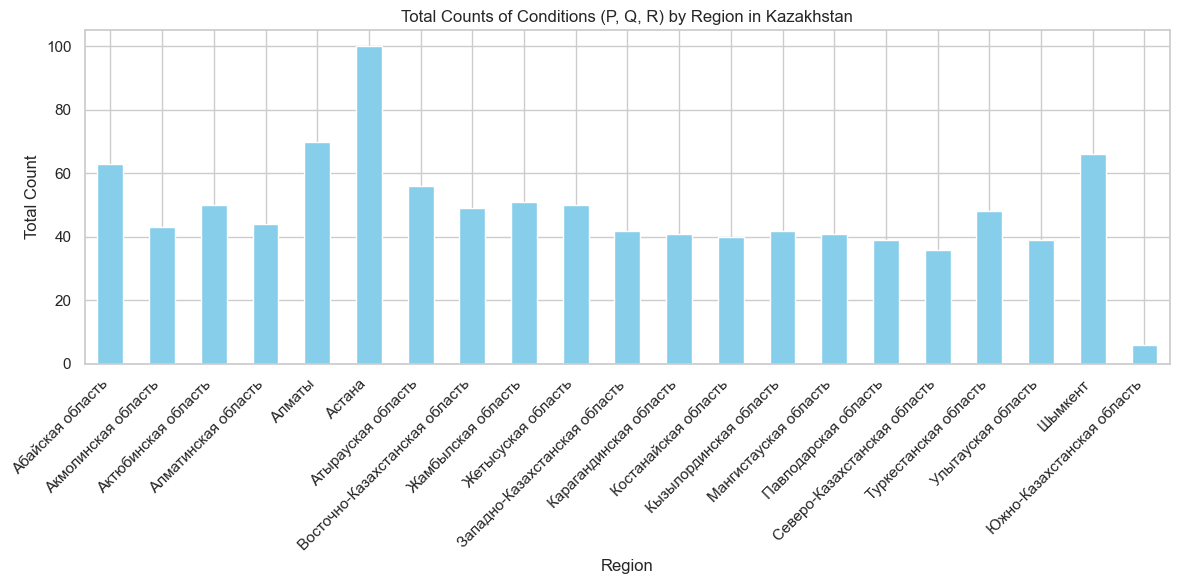

In [106]:
conditions_PQR = df[df['code'].str.startswith(('P', 'Q', 'R'))]

conditions_counts_by_region = conditions_PQR.groupby('region').size()

plt.figure(figsize=(12, 6))
conditions_counts_by_region.plot(kind='bar', color='skyblue')
plt.title('Total Counts of Conditions (P, Q, R) by Region in Kazakhstan')
plt.xlabel('Region')
plt.ylabel('Total Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- We can see that most of them meet in Astana and Shymkent city which is pretty obvious, because they are megapolisess with large populations.

#### How many patients are there in each region (find out the sickest and healthiest regions)

In [110]:
# Суммирование количества пациентов для каждого региона
patients_per_region = df.groupby('region')['pcount'].sum()

# Определение самого больного региона
most_patients_region = patients_per_region.idxmax()
most_patients_count = patients_per_region.max()

# Определение самого здорового региона
least_patients_region = patients_per_region.idxmin()
least_patients_count = patients_per_region.min()

# Вывод результатов
print("Самый больной регион:", most_patients_region, "с общим количеством пациентов:", most_patients_count)
print("Самый здоровый регион:", least_patients_region, "с общим количеством пациентов:", least_patients_count)


Самый больной регион: Туркестанская область с общим количеством пациентов: 575604
Самый здоровый регион: Южно-Казахстанская область с общим количеством пациентов: 7447


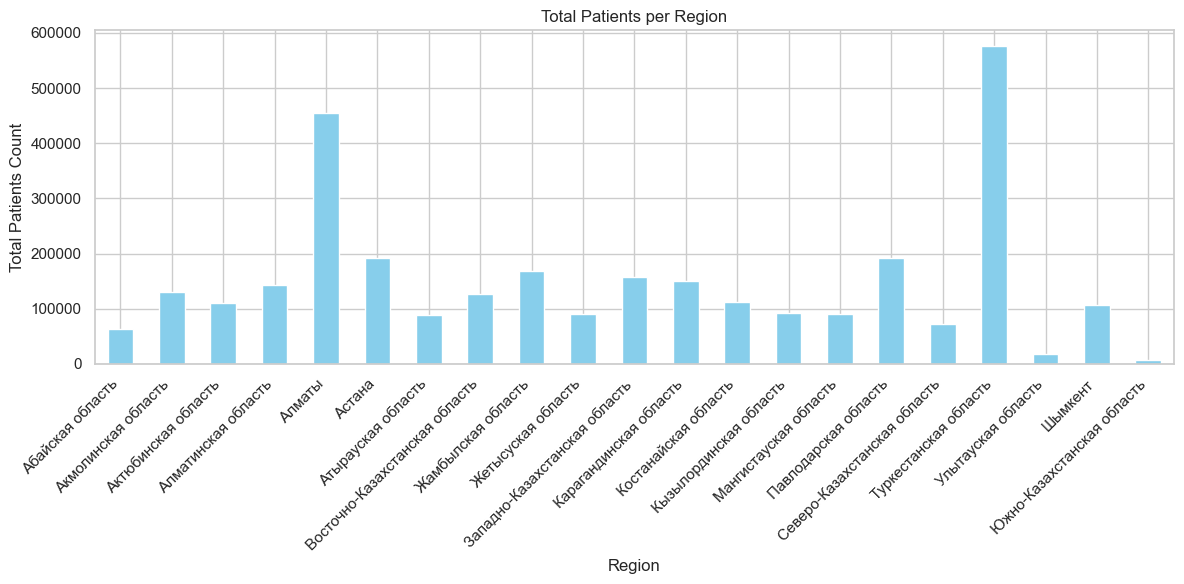

In [111]:
import matplotlib.pyplot as plt

# Создание гистограммы
plt.figure(figsize=(12, 6))
patients_per_region.plot(kind='bar', color='skyblue')
plt.title('Total Patients per Region')
plt.xlabel('Region')
plt.ylabel('Total Patients Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
